In [4]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_excel('Example.xlsx')
df

,Weight,Height
0,62,156
1,51,176
2,51,152
3,53,152
4,50,161
5,58,179
6,54,154
7,51,160
8,59,158
9,53,151


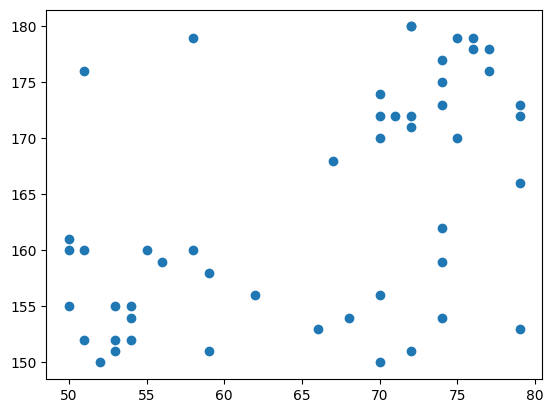

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['Weight'],df['Height'])
plt.show()

[ 2.          2.23606798  2.23606798  2.23606798  2.23606798  2.23606798
  2.23606798  2.23606798  2.23606798  2.23606798  2.82842712  2.82842712
  2.82842712  2.82842712  2.82842712  3.          3.          3.16227766
  3.16227766  3.16227766  3.60555128  3.60555128  4.12310563  4.12310563
  4.12310563  4.47213595  4.47213595  4.47213595  4.47213595  5.
  5.          5.          5.          5.          5.09901951  5.09901951
  5.09901951  5.38516481  5.65685425  5.65685425  5.83095189  5.83095189
  6.          6.          7.          7.81024968  8.          9.48683298
 14.03566885 16.03121954]


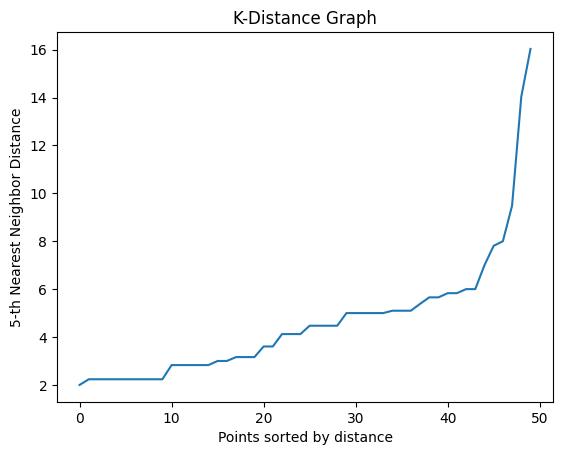

In [25]:
X = df[['Weight', 'Height']].values
# Compute the 5th nearest neighbor distances
from sklearn.neighbors import NearestNeighbors
k = 5
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)
# print(distances)
# print('\n')

# Sort and plot the distances for the k-th nearest neighbors
distances = np.sort(distances[:, k - 1])
print(distances)
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.title("K-Distance Graph")
plt.show()

In [26]:
# so eps or radius = 8 or 6

Cluster
 0    26
 1    21
-1     3
Name: count, dtype: int64


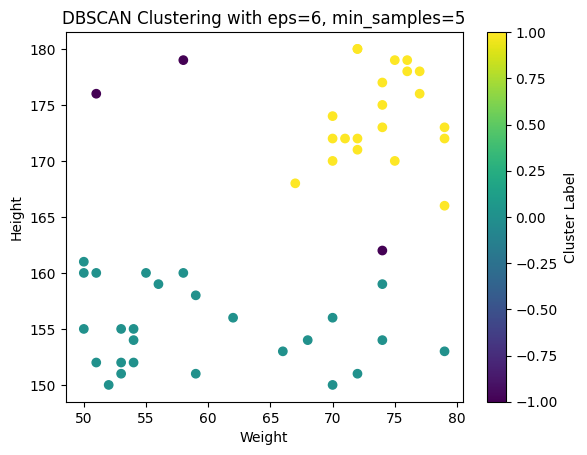

In [36]:
# Apply DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=6, min_samples=5)
labels = dbscan.fit_predict(X)

# Add labels to the DataFrame for easier analysis
df['Cluster'] = labels
print(df['Cluster'].value_counts())  # Check distribution of clusters

# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('DBSCAN Clustering with eps=6, min_samples=5')
plt.colorbar(label='Cluster Label')
plt.show()